In [1]:
## Import libraries
import pandas as pd
pd.set_option('display.max_rows', 20)
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts size of plots


## Read in data
data = pd.read_csv('/Users/andrewfox/Downloads/movies.csv')

In [2]:
### EDA and data cleaning
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
## See if there's missing data
pd.isnull(data).any(axis=0)

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

In [4]:
## Remove rows with NAs
data = data.dropna()
pd.isnull(data).any(axis=0)

name        False
rating      False
genre       False
year        False
released    False
score       False
votes       False
director    False
writer      False
star        False
country     False
budget      False
gross       False
company     False
runtime     False
dtype: bool

In [5]:
## Normalize data types
# The 'budget' and 'gross' columns do not need decimal points
data['budget'] = data['budget'].astype('int64')
data['gross'] = data['gross'].astype('int64')

In [6]:
data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [7]:
## Normalize 'year' year and 'released' year
data['correct_year'] = data['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [13]:
## Sort by 'gross' descending
#data = data.sort_values(by=['gross'], inplace=False, ascending=False)

In [10]:
## Drop duplicates
all(data.duplicated()) == False #there are no duplicate rows

True

In [11]:
all(data.duplicated(subset=['name'])) == False #there are no duplicate movie entries

True

<function matplotlib.pyplot.show(close=None, block=None)>

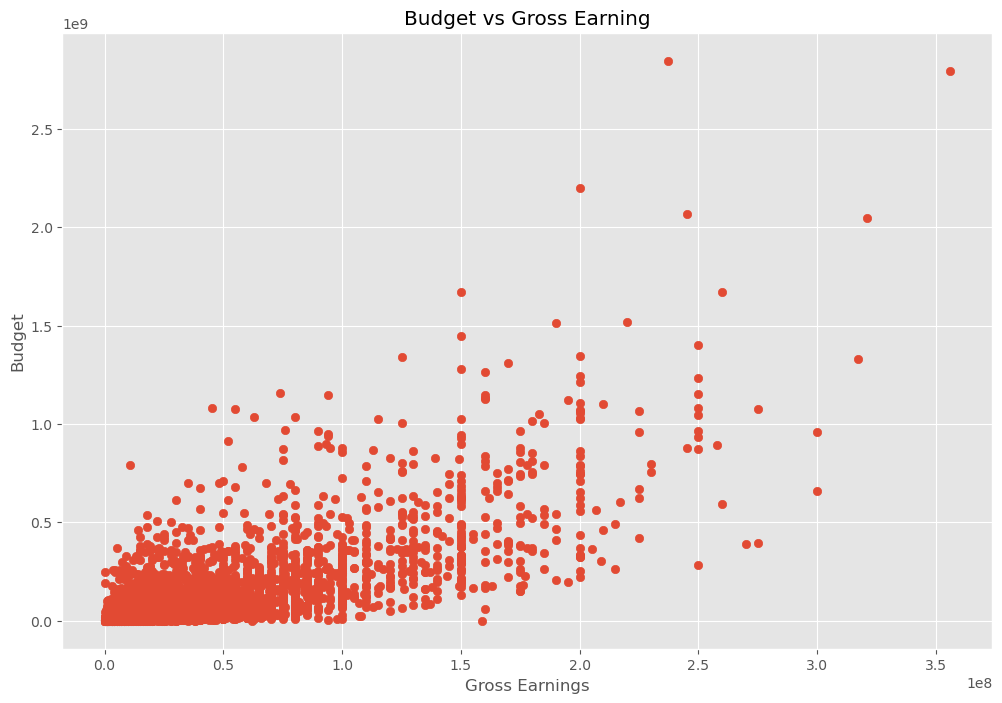

In [14]:
#### Finding correlations
### Budget
## Scatterplot budget vs gross
plt.scatter(y=data['budget'], x=data['gross'])
plt.title("Budget vs Gross Earning")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget")
plt.show


<Axes: xlabel='budget', ylabel='gross'>

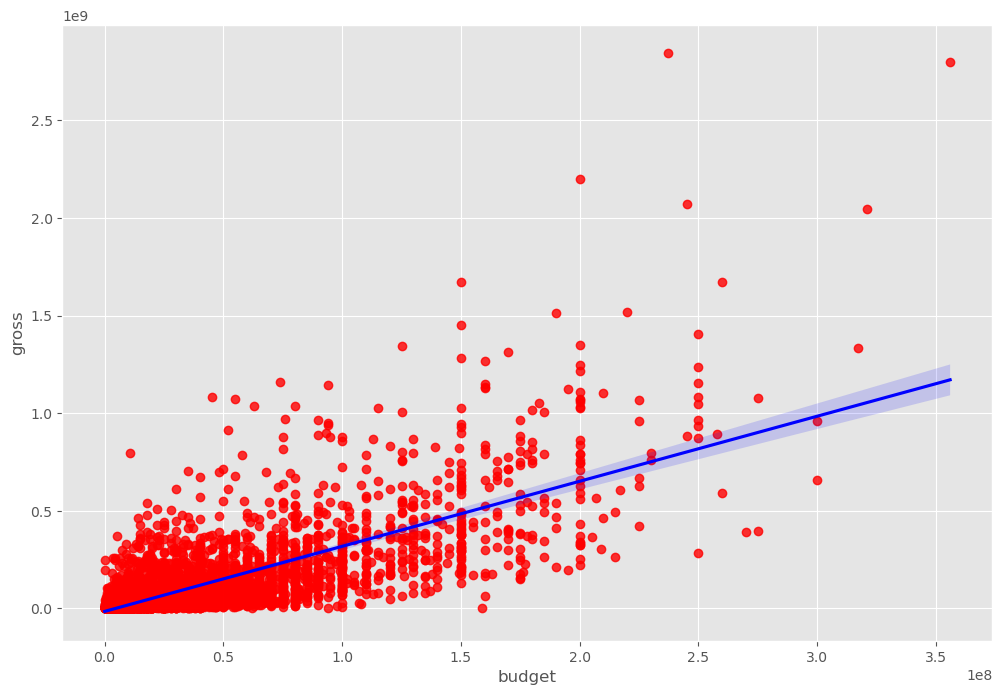

In [15]:
## Plot budget vs gross in seaborn
sns.regplot(x='budget', y='gross', data=data, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [17]:
## Correlation matrix
corr_mat = data.corr(method='pearson') #high correlation between budget and gross
corr_mat

/var/folders/0_/l4s85yyx0nq0sr3jrhhw7n740000gn/T/ipykernel_77199/4245213824.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr(method='pearson') #high correlation between budget and gross


,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correct_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


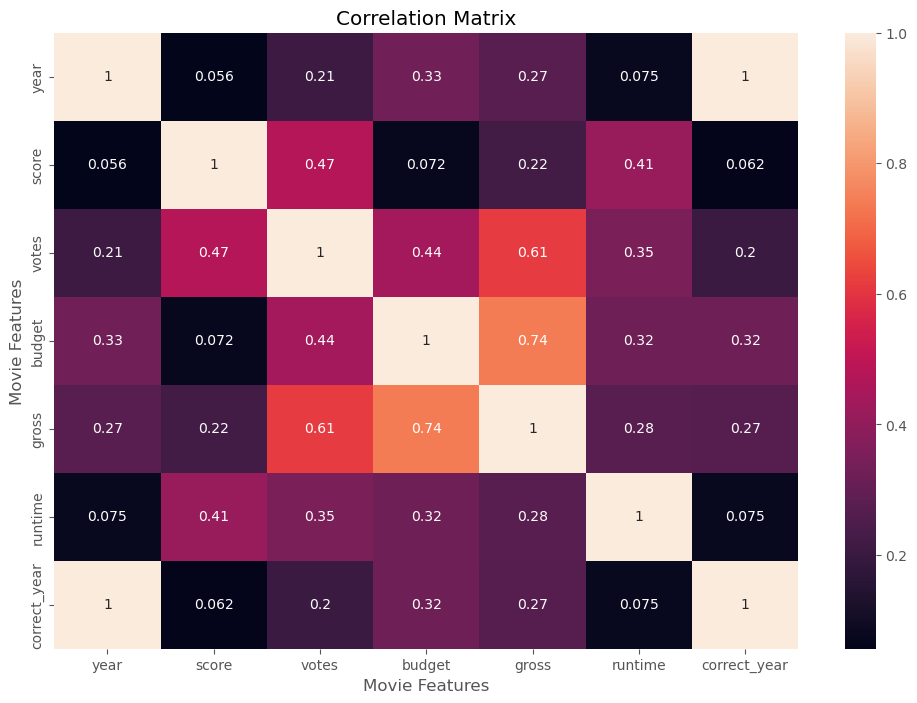

In [19]:
## Plot heat map for correlations
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()